<a href="https://colab.research.google.com/github/szh141/UVA-AMF/blob/main/I2K_2023/part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=zCx1vmZUcxA

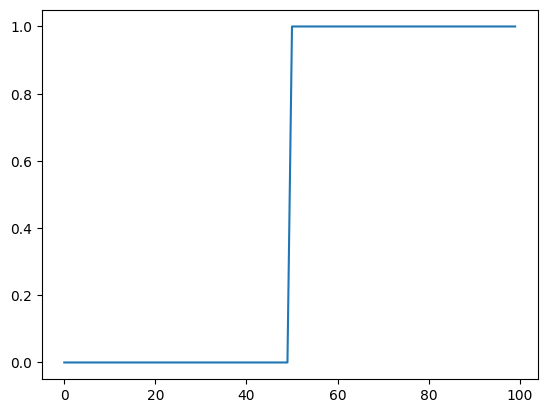

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# 1D signal
step_signal = np.zeros(100)
step_signal[50:]=1

np.random.seed(seed=31)
noise = np.random.normal(0,0.35,step_signal.shape)
noisy = step_signal+noise

fig,ax=plt.subplots()
ax.plot(step_signal)
plt.show()

# think of [-1,0-1] convolve on this 1D step signal

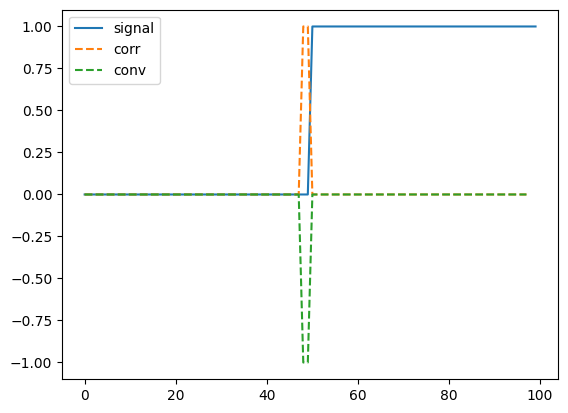

In [ ]:
kernel = np.array([-1,0,1])

corr = np.correlate(step_signal,kernel,
                    mode='valid')

conv = np.convolve(step_signal,kernel,
                    mode='valid')

fig,ax=plt.subplots()
ax.plot(step_signal,label='signal')
ax.plot(corr,linestyle='dashed',label='corr')
ax.plot(conv,linestyle='dashed',label='conv')
ax.legend(loc='upper left')
plt.show()

# this is technically an edge detection filter, very sensitive to noise
# convolve point down, correlate point up

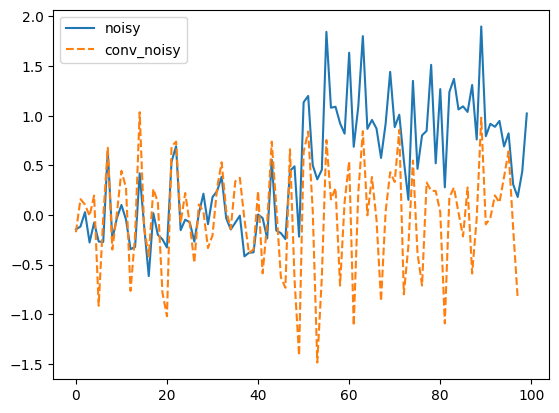

In [ ]:
conv_noisy = np.convolve(noisy,kernel,
                    mode='valid')

fig,ax=plt.subplots()
ax.plot(noisy,label='noisy')
ax.plot(conv_noisy,linestyle='dashed',label='conv_noisy')
ax.legend(loc='upper left')
plt.show()

# in noisy, signal. edge detection basically detects noise
# the lowest peak is no longer the edge, actually quite close
# that's why we need smoothing

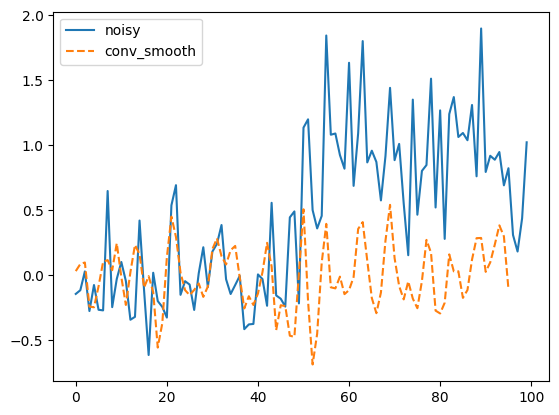

In [6]:
smooth = np.convolve(noisy,np.array([1/3,1/3,1/3]),
                    mode='valid')
conv_smooth = np.convolve(smooth,np.array([-1,0,1]),
                    mode='valid')
# can also convolve two kernels, communicative

fig,ax=plt.subplots()
ax.plot(noisy,label='noisy')
ax.plot(conv_smooth,linestyle='dashed',label='conv_smooth')
ax.legend(loc='upper left')
plt.show()